# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [5]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [33]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


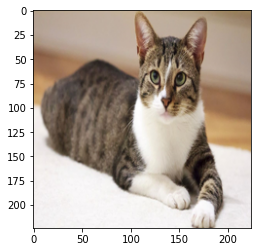

In [34]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg').resize((224, 224))
plt.imshow(img);

In [24]:
img = np.array(img.resize((224, 224)))
img.shape

(224, 224, 3)

* 이미지 예측

In [25]:
yhat = vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)    # decode_prediction : 1000개 중 가장 확률 높은 n개 출력해준다(default : 5개)
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.57871205),
   ('n02123045', 'tabby', 0.32011372),
   ('n02123159', 'tiger_cat', 0.098547764),
   ('n04040759', 'radiator', 0.00047500042),
   ('n02127052', 'lynx', 0.00045133987)]])

In [26]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.57871205)

In [27]:
print(f'예측 : {label[0][0][1]}')

예측 : Egyptian_cat


In [28]:
yhat = vgg19.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.7138556),
   ('n02123159', 'tiger_cat', 0.13995053),
   ('n02124075', 'Egyptian_cat', 0.13959225),
   ('n03223299', 'doormat', 0.0007909445),
   ('n04040759', 'radiator', 0.0007151915)]])

- 이미지를 224 x 224 사이즈로 자르기

In [35]:
img = Image.open('cat.jpg')
h, w, _ = np.array(img).shape
h, w

(448, 680)

In [37]:
if h > w:
    width, height = 224, (h*224 ) // w
else:
    width, height = (w*224)//h, 224
height, width

(224, 340)

In [40]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 340, 3)

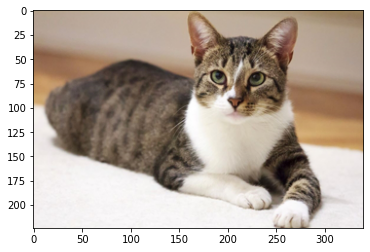

In [41]:
plt.imshow(new_img);

In [42]:
diff = abs(width - height)//2       # 행과 열의 차이를 2로 나눈 것
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = ner_img[diff:diff+224, :, :]

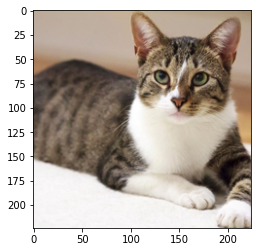

In [45]:
plt.imshow(final_img);

In [46]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h*IMAGE_SIZE ) // w
    else:
        width, height = (w*IMAGE_SIZE)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2       # 행과 열의 차이를 2로 나눈 것
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = ner_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

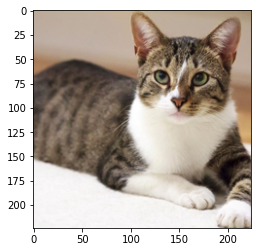

In [47]:
img = Image.open('cat.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [49]:
yhat = vgg16.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.56075007),
   ('n02124075', 'Egyptian_cat', 0.28903008),
   ('n02123159', 'tiger_cat', 0.14672889),
   ('n02127052', 'lynx', 0.00092879555),
   ('n04040759', 'radiator', 0.00053233537)]])

In [50]:
yhat = vgg19.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.6335459),
   ('n02123159', 'tiger_cat', 0.24614216),
   ('n02124075', 'Egyptian_cat', 0.11823103),
   ('n03887697', 'paper_towel', 0.0006189527),
   ('n02127052', 'lynx', 0.00039780338)]])